In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
!pip install pandasql
from pandasql import sqldf


## Data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [9]:
df = df[df['year'].notna()]

In [10]:
df[df['publisher'].isna()].head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.0,0.01,0.53


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16327 non-null  int64  
 1   name          16327 non-null  object 
 2   platform      16327 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16327 non-null  object 
 5   publisher     16327 non-null  object 
 6   na_sales      16327 non-null  float64
 7   eu_sales      16327 non-null  float64
 8   jp_sales      16327 non-null  float64
 9   other_sales   16327 non-null  float64
 10  global_sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
df.isna().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

## Question 1: In what year were the most games sold?

In [18]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
data = df.groupby(by = 'year', as_index = False)['global_sales'].sum()
data.head()

,year,global_sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


In [20]:
sns.set(style = 'darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

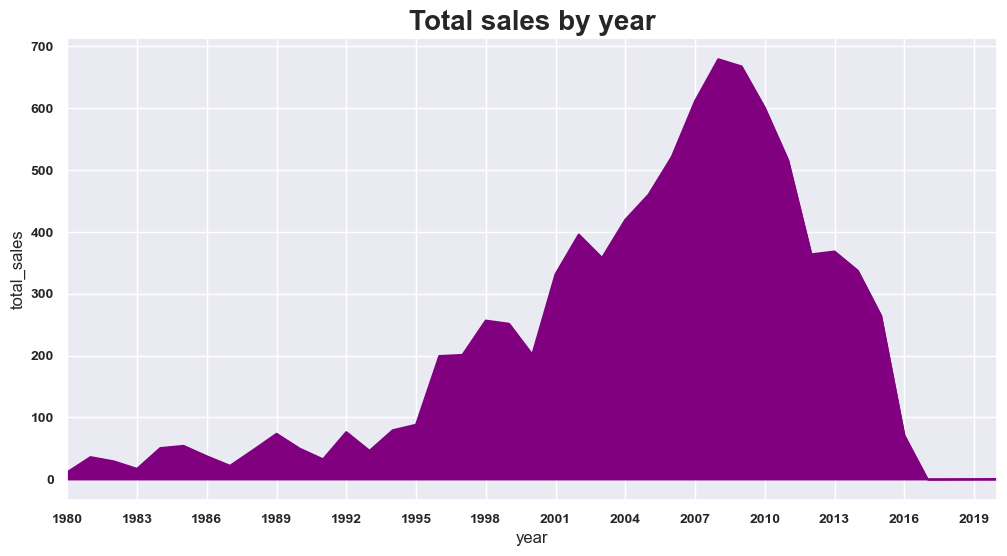

In [21]:
plt.title('Total sales by year', weight = 'heavy',size = 20)
ax = sns.lineplot(data = data, x = 'year', y = 'global_sales',color = 'purple')

plt.xticks(np.arange(data['year'].min(),data['year'].max(),3), weight = 'bold',size = 10)
plt.yticks(weight = 'bold',size = 10)

plt.xlim(data['year'].min(),data['year'].max())

ax.set(ylabel = 'total_sales')

plt.fill_between (data['year'], data['global_sales'], color='purple')

In [22]:
data.sort_values(by = 'global_sales',ascending = False).head(5)

,year,global_sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04


In [23]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
data = df.groupby(by = 'genre',as_index = False)[['na_sales','eu_sales','jp_sales','global_sales']].sum() \
        .sort_values(by = ['na_sales','eu_sales','jp_sales','global_sales'], ascending = False)
data = data.head()
data

,genre,na_sales,eu_sales,jp_sales,global_sales
0,Action,861.80,516.48,158.66,1722.88
10,Sports,670.09,371.34,134.76,1309.24
8,Shooter,575.16,310.45,38.18,1026.20
4,Platform,445.99,200.67,130.65,829.15
3,Misc,402.48,213.82,106.67,797.62


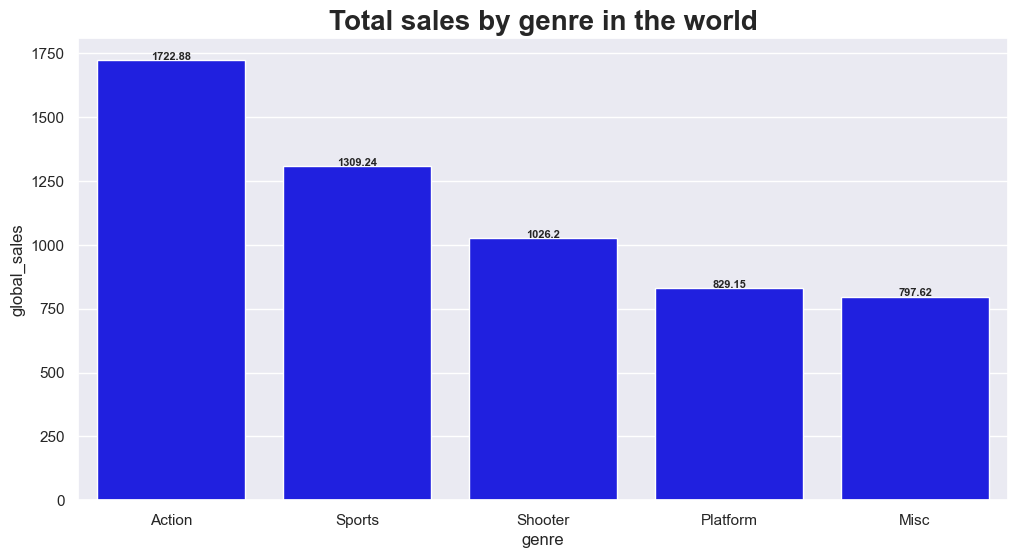

In [25]:
plt.title('Total sales by genre in the world',size = 20,weight = 'heavy')

sns.barplot(data = data, x = 'genre', y = 'global_sales',color = 'blue')

for i,v in enumerate(data['global_sales']):
  plt.text(i,v + 2,str(v),ha = 'center', weight = 'bold',size = 8)




## Question No 3: What is the best platforms to sell games on?

In [26]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
data = df[['platform','global_sales']].groupby(by = 'platform', as_index = False)\
   .sum() \
   .sort_values(by = 'global_sales', ascending = False) \
   .head()
data

,platform,global_sales
16,PS2,1233.46
28,X360,969.61
17,PS3,949.35
26,Wii,909.81
4,DS,818.96


<AxesSubplot:title={'center':'The best platform to sell your games!'}, xlabel='global_sales', ylabel='platform'>

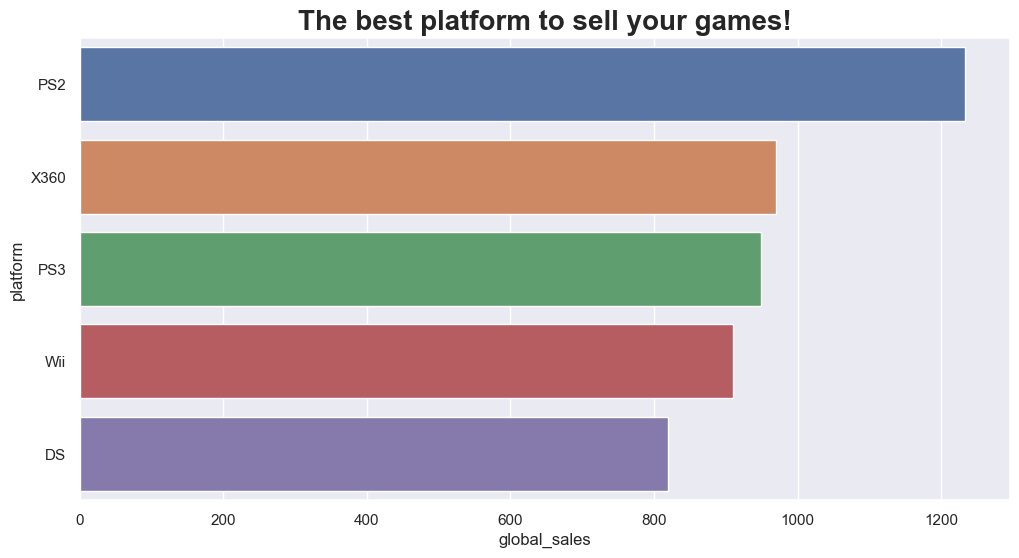

In [28]:
plt.title('The best platform to sell your games!', weight = 'heavy',size = 20)

sns.barplot(data = data, x = 'global_sales', y = 'platform')

In [30]:
df.query('global_sales > 40 and na_sales > 20')

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [31]:
data = df['genre'].value_counts()
data

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

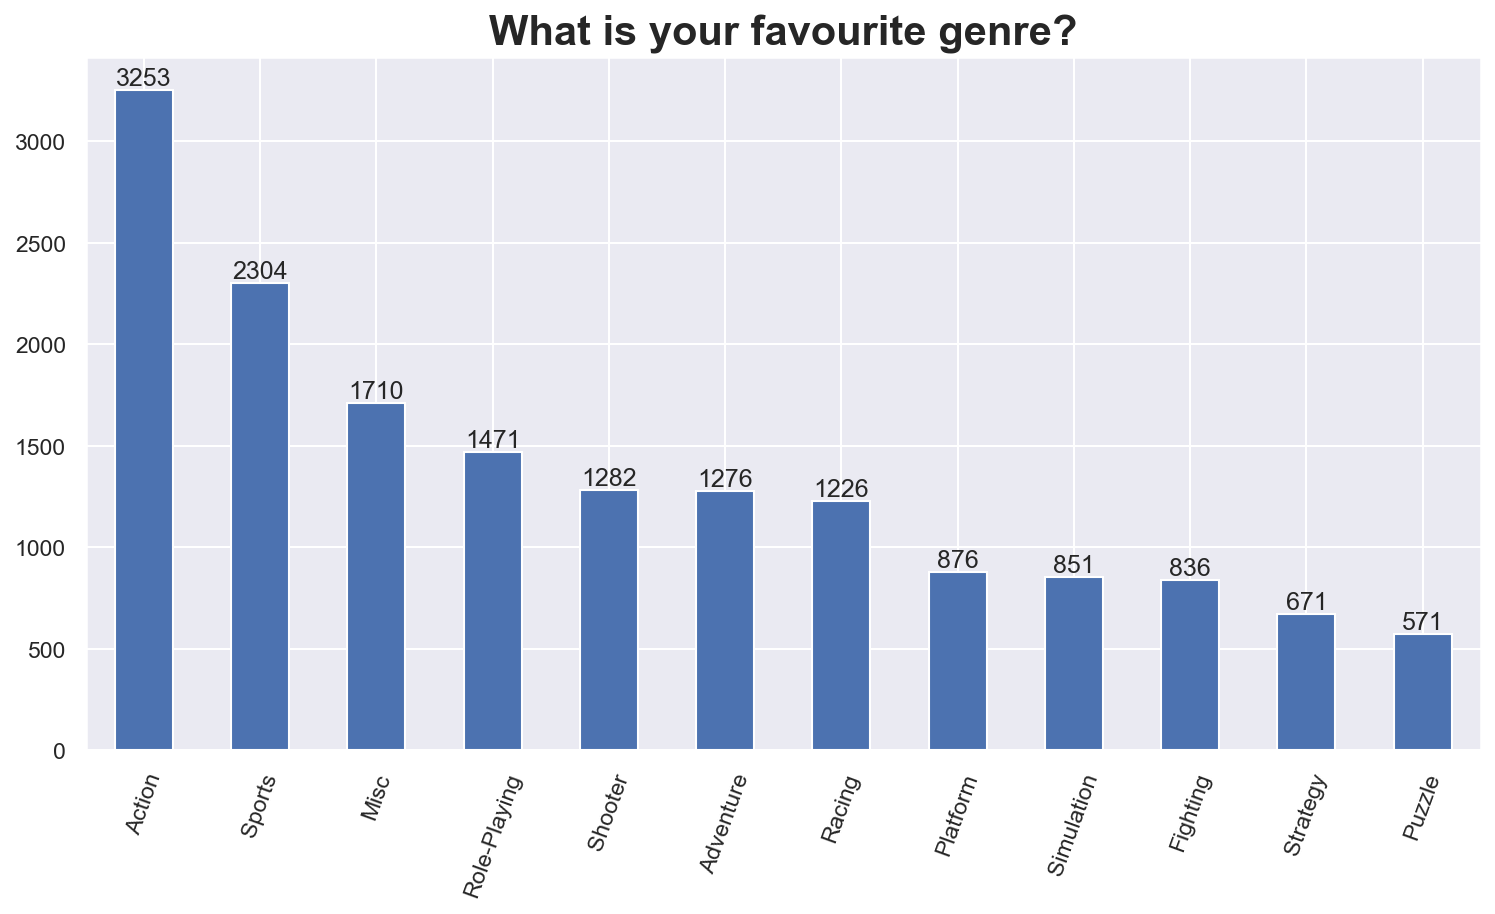

In [32]:
plt.figure(figsize = (12,6), dpi = 150)
plt.title('What is your favourite genre?', size = 20,weight = 'heavy')

data.plot.bar().bar_label(data.plot.bar().containers[0],label_type='edge')

plt.xticks(rotation = 70)

In [33]:
df.duplicated().sum()

0

## Question: What is TOP 10 platforms in Japan?

In [34]:
data = df.groupby(by = 'platform', as_index = False)['jp_sales'].sum() \
   .sort_values(by = 'jp_sales', ascending = False) \
   .head(10)
data

,platform,jp_sales
4,DS,175.02
15,PS,139.78
16,PS2,137.54
23,SNES,116.55
11,NES,98.65
2,3DS,97.30
5,GB,85.12
17,PS3,79.21
19,PSP,75.89
26,Wii,68.28


<AxesSubplot:title={'center':'Top 10 platforms in Japan'}, xlabel='jp_sales', ylabel='platform'>

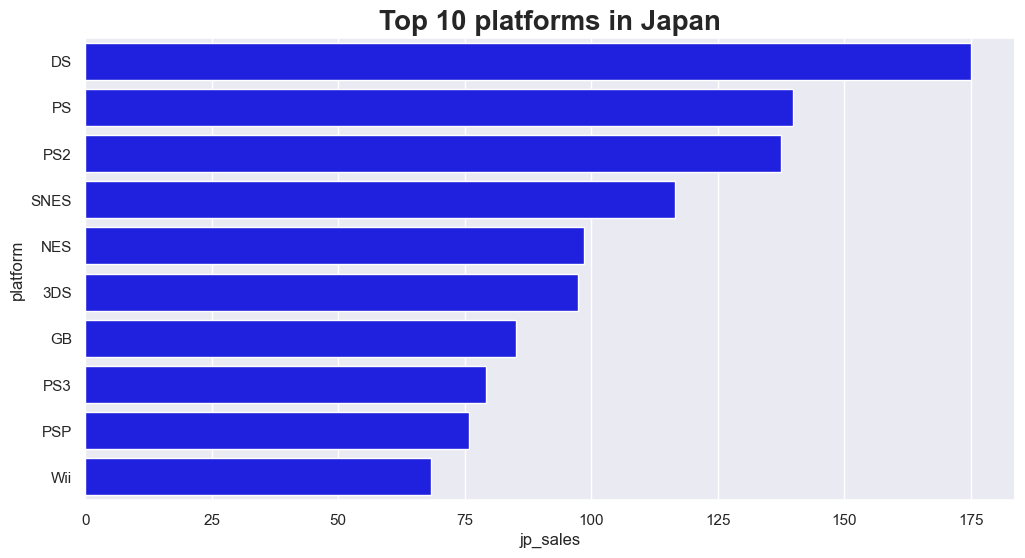

In [35]:
plt.title('Top 10 platforms in Japan',size = 20,weight = 'bold')
sns.barplot(data = data, x = 'jp_sales', y = 'platform',color = 'blue')

## Global sales and platforms

In [36]:
data = df.groupby(by = 'platform', as_index = False)['global_sales'].sum() \
  .sort_values(by = 'global_sales',ascending = False)
data

,platform,global_sales
16,PS2,1233.46
28,X360,969.61
17,PS3,949.35
26,Wii,909.81
4,DS,818.96
15,PS,727.39
6,GBA,313.56
19,PSP,291.71
18,PS4,278.10
13,PC,255.05


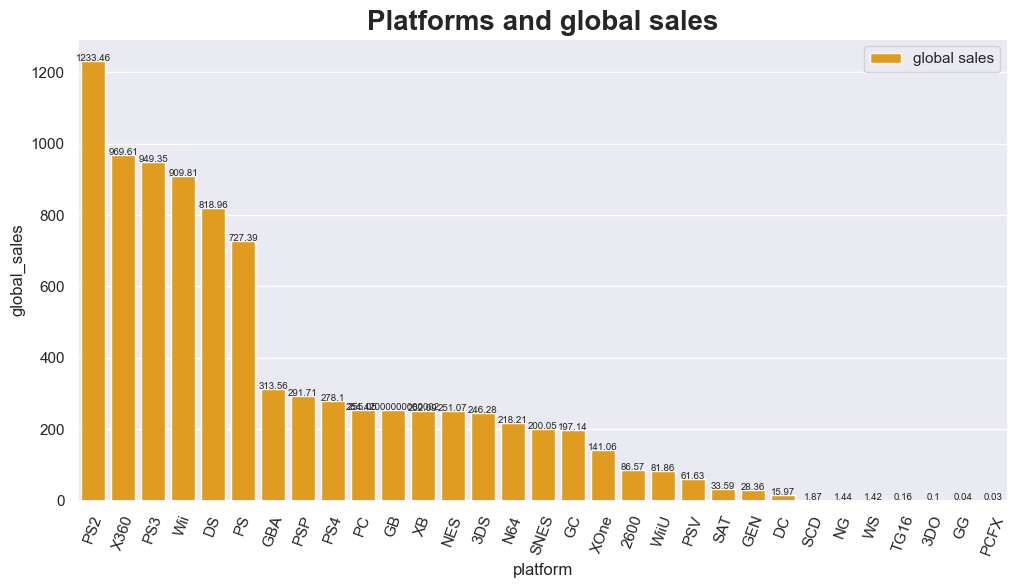

In [37]:
plt.title('Platforms and global sales', weight = 'heavy', size = 20)
sns.barplot(data = data, 
            x = 'platform',
            y = 'global_sales',
            label = 'global sales',
            color = 'orange')

plt.xticks(rotation = 70)

for i,v in enumerate(data['global_sales']):
  plt.text(i,v,str(v), ha = 'center',size = 7)


plt.legend()